In [1]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "PFE"
noOfTweet = int('600')


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  146
negative number:  47
neutral number:  407


In [7]:
tweet_list


,0
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...
2,"The more things change, the more they remain t..."
3,CureVac scraps its first #COVID19 vaccine and ...
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...
...,...
595,#StocksToBuy \n\n✅#CSE / $IONC 🔥 #OTC / $IONKF...
596,@BryanDeanWright @NIH Because he and Nancy are...
597,【48hタイムセール祭 10/10 23:59まで】【1位3冠受賞☆PFE/BFE99% 血...
598,🔥 #StocksToBuy 📢 #WHSI ~ Castle Placement Name...


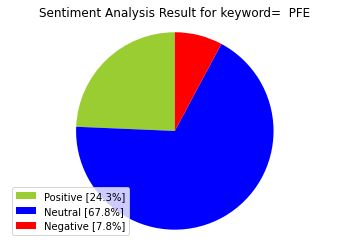

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)


In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...
2,"The more things change, the more they remain t...","The more things change, the more they remain t..."
3,CureVac scraps its first #COVID19 vaccine and ...,CureVac scraps its first #COVID19 vaccine and ...
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...
...,...,...
595,#StocksToBuy \n\n✅#CSE / $IONC 🔥 #OTC / $IONKF...,#StocksToBuy \n\n✅#CSE / $IONC 🔥 #OTC / $IONKF...
596,@BryanDeanWright @NIH Because he and Nancy are...,@BryanDeanWright @NIH Because he and Nancy are...
597,【48hタイムセール祭 10/10 23:59まで】【1位3冠受賞☆PFE/BFE99% 血...,【48hタイムセール祭 10/10 23:59まで】【1位3冠受賞☆PFE/BFE99% 血...
598,🔥 #StocksToBuy 📢 #WHSI ~ Castle Placement Name...,🔥 #StocksToBuy 📢 #WHSI ~ Castle Placement Name...


In [11]:
tweet_list

,0,text
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...
2,"The more things change, the more they remain t...","The more things change, the more they remain t..."
3,CureVac scraps its first #COVID19 vaccine and ...,CureVac scraps its first #COVID19 vaccine and ...
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...
...,...,...
595,#StocksToBuy \n\n✅#CSE / $IONC 🔥 #OTC / $IONKF...,#StocksToBuy \n\n✅#CSE / $IONC 🔥 #OTC / $IONKF...
596,@BryanDeanWright @NIH Because he and Nancy are...,@BryanDeanWright @NIH Because he and Nancy are...
597,【48hタイムセール祭 10/10 23:59まで】【1位3冠受賞☆PFE/BFE99% 血...,【48hタイムセール祭 10/10 23:59まで】【1位3冠受賞☆PFE/BFE99% 血...
598,🔥 #StocksToBuy 📢 #WHSI ~ Castle Placement Name...,🔥 #StocksToBuy 📢 #WHSI ~ Castle Placement Name...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...,kaei kaei 3 ...
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...,stockalert stockstobuy fomo corp otc ...
2,"The more things change, the more they remain t...",the more things change the more they remain t...
3,CureVac scraps its first #COVID19 vaccine and ...,curevac scraps its first covid19 vaccine and ...
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...,ionic brands corp ionc ionkf repre...
5,RT @DWilliam5777: $TM $NKE $CMCSA $KO $PFE $CS...,tm nke cmcsa ko pfe csco tmo hey chec...
6,$TM $NKE $CMCSA $KO $PFE $CSCO $TMO\nHey! Chec...,tm nke cmcsa ko pfe csco tmo hey check...
7,RT @PunditPatent: $ABUS - The Patent Office is...,abus the patent office issued abus it s ne...
8,"Real price will come out soon,, Follow price t...",real price will come out soon follow price t...
9,RT @issssps: 🎊พร้อมส่ง 🎊หน้ากากอนามัยการแพทย์ ...,medimask ast...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...,kaei kaei 3 ...,0.000000,0.000000,negative,0.293,0.569,0.138,-0.4404
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...,stockalert stockstobuy fomo corp otc ...,0.000000,0.000000,positive,0.000,0.709,0.291,0.4767
2,"The more things change, the more they remain t...",the more things change the more they remain t...,0.375000,0.406250,positive,0.000,0.909,0.091,0.2023
3,CureVac scraps its first #COVID19 vaccine and ...,curevac scraps its first covid19 vaccine and ...,0.125000,0.166667,neutral,0.000,1.000,0.000,0.0000
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...,ionic brands corp ionc ionkf repre...,-0.012500,0.737500,positive,0.000,0.676,0.324,0.5859
5,RT @DWilliam5777: $TM $NKE $CMCSA $KO $PFE $CS...,tm nke cmcsa ko pfe csco tmo hey chec...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,$TM $NKE $CMCSA $KO $PFE $CSCO $TMO\nHey! Chec...,tm nke cmcsa ko pfe csco tmo hey check...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @PunditPatent: $ABUS - The Patent Office is...,abus the patent office issued abus it s ne...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
8,"Real price will come out soon,, Follow price t...",real price will come out soon follow price t...,0.200000,0.300000,neutral,0.000,1.000,0.000,0.0000
9,RT @issssps: 🎊พร้อมส่ง 🎊หน้ากากอนามัยการแพทย์ ...,medimask ast...,0.000000,0.000000,negative,0.310,0.690,0.000,-0.5574


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,269,58.48
positive,136,29.57
negative,55,11.96


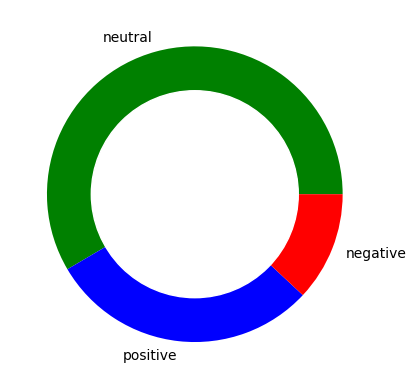

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [22]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [23]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,109.31
neutral,78.94
positive,105.40


In [24]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,15.58
neutral,10.44
positive,17.47


In [25]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [26]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [27]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [28]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [29]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [30]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,KAEI の （全国マスク工業会正会員 ）KAEI 3層オメガプリーツマスク 普通サイズ（約...,kaei kaei 3 ...,0.0000,0.000000,negative,0.293,0.569,0.138,-0.4404,111,12,kaei kaei ...,"[kaei, kaei, cm, bfe, pfe, vfe, amazon, ]","[kaei, kaei, cm, bfe, pfe, vfe, amazon, ]","[kaei, kaei, cm, bfe, pfe, vfe, amazon, ]"
1,💯#StockAlert #StocksTobuy @ipoguy\n\n📈 FOMO CO...,stockalert stockstobuy fomo corp otc ...,0.0000,0.000000,positive,0.000,0.709,0.291,0.4767,108,13,stockalert stockstobuy fomo corp otc ...,"[, stockalert, stockstobuy, fomo, corp, otc, f...","[, stockalert, stockstobuy, fomo, corp, otc, f...","[, stockalert, stockstobuy, fomo, corp, otc, f..."
2,"The more things change, the more they remain t...",the more things change the more they remain t...,0.3750,0.406250,positive,0.000,0.909,0.091,0.2023,118,21,the more things change the more they remain t...,"[the, more, things, change, the, more, they, r...","[things, change, remain, top, stocks, xom, usb...","[thing, chang, remain, top, stock, xom, usb, i..."
3,CureVac scraps its first #COVID19 vaccine and ...,curevac scraps its first covid19 vaccine and ...,0.1250,0.166667,neutral,0.000,1.000,0.000,0.0000,94,16,curevac scraps its first covid vaccine and pi...,"[curevac, scraps, its, first, covid, vaccine, ...","[curevac, scraps, first, covid, vaccine, pivot...","[curevac, scrap, first, covid, vaccin, pivot, ..."
4,✅Ionic Brands Corp. 👉 $IONC 💲 $IONKF 👈\n\n✅Rep...,ionic brands corp ionc ionkf repre...,-0.0125,0.737500,positive,0.000,0.676,0.324,0.5859,118,15,ionic brands corp ionc ionkf repre...,"[, ionic, brands, corp, ionc, ionkf, represent...","[, ionic, brands, corp, ionc, ionkf, represent...","[, ionic, brand, corp, ionc, ionkf, repres, si..."


In [31]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

460 Number of reviews has 1667 words


In [32]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aal,aan,aapl,abb,abbv,abo,aboard,absurd,abu,...,year,yearli,yep,yesterday,zero,zimbabw,zinc,zm,zom,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pfe,234
mrna,65
bfe,37
covid,37
tsla,32
pfizer,31
vaccin,28
bntx,26
stock,24
mrk,23


In [34]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('mrna pfe', 20),
 ('pfe mrna', 16),
 ('covid 19', 14),
 ('pfe bfe99', 12),
 ('pfe bntx', 11),
 ('btc eth', 9),
 ('10 13', 9),
 ('bfe pfe', 8),
 ('covid vaccine', 8),
 ('morgan stanley', 8),
 ('10 12', 8),
 ('price target', 7),
 ('vfe pfe', 7),
 ('bntx mrna', 7),
 ('bfe99 50', 7),
 ('mrk pfe', 7),
 ('face mask', 7),
 ('pfe gt', 7),
 ('pfe vfe99', 6),
 ('fomo corp', 6)]

In [36]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('pfe bfe99 50', 7),
 ('bfe pfe vfe99', 6),
 ('mrna pfe bntx', 6),
 ('10 13 pfe', 6),
 ('surgical face mask', 6),
 ('amp pfe gt', 6),
 ('48h 10 10', 6),
 ('10 10 23', 6),
 ('10 23 59', 6),
 ('23 59 pfe', 6),
 ('59 pfe bfe99', 6),
 ('fomo corp otc', 5),
 ('corp otc fomc', 5),
 ('new free options', 5),
 ('discord link bio', 5),
 ('link bio join', 5),
 ('bio join btc', 5),
 ('join btc eth', 5),
 ('btc eth ech', 5),
 ('eth ech bch', 5)]

In [37]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [44]:
PFE = yf.download("PFE", start="2021-10-11", end="2021-10-12", interval = "1h")
PFE

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,42.389999,42.619999,42.325001,42.507000,42.507000,2032249
2021-10-11 10:30:00-04:00,42.506100,42.610001,42.419998,42.450001,42.450001,1182340
2021-10-11 11:30:00-04:00,42.450001,42.520000,42.349998,42.419899,42.419899,1170314
2021-10-11 12:30:00-04:00,42.415001,42.430000,42.119999,42.139999,42.139999,1147444
2021-10-11 13:30:00-04:00,42.134998,42.139999,42.020000,42.060001,42.060001,1176927
2021-10-11 14:30:00-04:00,42.060001,42.154999,42.040001,42.099998,42.099998,1415788
2021-10-11 15:30:00-04:00,42.099899,42.150002,42.010101,42.060001,42.060001,2105362


<AxesSubplot:>

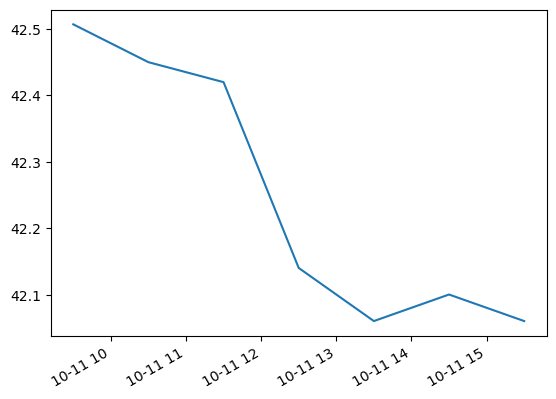

In [45]:
PFE['Adj Close'].plot()

In [46]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                460 non-null    object 
 1   text             460 non-null    object 
 2   polarity         460 non-null    float64
 3   subjectivity     460 non-null    float64
 4   sentiment        460 non-null    object 
 5   neg              460 non-null    float64
 6   neu              460 non-null    float64
 7   pos              460 non-null    float64
 8   compound         460 non-null    float64
 9   text_len         460 non-null    int64  
 10  text_word_count  460 non-null    int64  
 11  punct            460 non-null    object 
 12  tokenized        460 non-null    object 
 13  nonstop          460 non-null    object 
 14  stemmed          460 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 73.7+ KB
